In [1]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np

import random
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Activation, Reshape, MaxPooling1D, GlobalAveragePooling1D
from keras.optimizers import RMSprop
from keras import backend as K
from keras.layers.convolutional import Conv1D, Conv2D
from keras import optimizers
import sys
import keras.utils
import os
sys.path.append(os.path.join(sys.path[0], '../utils'))
from load_mat_file import load_mat_file, show_data, show_sample, load_all_data_multichannel 
from keras.callbacks import TensorBoard
import copy
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#, RobustScaler

from sklearn.datasets import fetch_california_housing

Using TensorFlow backend.


In [2]:
data_path = '../../data/'

In [3]:
def create_network(input_dim, num_classes):
    '''Base network to be shared (eq. to feature extraction).
    '''
    seq = Sequential()
    seq.add(Dense(128, input_shape=(input_dim,)))
    seq.add(Activation('relu'));
    seq.add(Dropout(0.1))
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(num_classes, activation='relu'))
    model.add(Activation('softmax'))
    return seq


def create_network_tu(max_words, num_classes):
    model = Sequential()
    model.add(Dense(512, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model;


def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return labels[predictions.ravel() < 0.5].mean()


def create_network_eeg_conv1(input_dim, num_classes):
    seq = Sequential()
    seq.add(Reshape(( input_dim, 1,), input_shape=(input_dim,)))
    seq.add(Conv1D(filters=16, kernel_size=5, activation='relu', strides=2))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 5, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 3, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 3, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(GlobalAveragePooling1D())
    #seq.add(Reshape(11328,1))
    seq.add(Dense(units=128))
    seq.add(Activation('relu'));
    seq.add(Dense(units=num_classes))
    #seq.add(Reshape((num_classes,)))
    seq.add(Activation('softmax'));
    return seq;

def create_network_eeg_conv1_multichannel(input_dim, num_channels, num_classes):
    seq = Sequential()
    #seq.add(Reshape(( input_dim, 1,), input_shape=(input_dim,)))
    seq.add(Conv1D(filters=64, kernel_size=5, activation='relu', strides=2, input_shape=(input_dim,num_channels,)))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 5, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 3, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 3, activation='relu'))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(GlobalAveragePooling1D())
    #seq.add(Reshape(11328,1))
    seq.add(Dense(units=128))
    seq.add(Activation('relu'));
    seq.add(Dense(units=num_classes))
    #seq.add(Reshape((num_classes,)))
    seq.add(Activation('softmax'));
    return seq;

In [4]:
def create_cnn_mc_small(input_dim, num_channels, num_classes):
    seq = Sequential()
    #seq.add(Reshape(( input_dim, 1,), input_shape=(input_dim,)))
    seq.add(Conv1D(filters=64, kernel_size=5, activation='elu', strides=2, input_shape=(input_dim,num_channels,)))
    seq.add(MaxPooling1D(3, strides=2))
    seq.add(Conv1D(32, 5, activation='elu'))
    seq.add(MaxPooling1D(3, strides=2))
    #seq.add(Conv1D(32, 3, activation='relu'))
    #seq.add(MaxPooling1D(3, strides=2))
    #seq.add(Conv1D(32, 3, activation='relu'))
    #seq.add(MaxPooling1D(3, strides=2))
    print (seq.output_shape)
    #seq.add(Reshape( (1,seq.output_shape[1]*seq.output_shape[2]) ))
    seq.add(GlobalAveragePooling1D())
    #seq.add(Reshape(11328,1))
    seq.add(Dense(units=32))
    seq.add(Activation('elu'));
    seq.add(Dense(units=num_classes))
    #seq.add(Reshape((num_classes,)))
    seq.add(Activation('softmax'));
    return seq;

#model = create_cnn_mc_small(size_of_sample, number_of_channels, num_classes)
#model = create_network_eeg_conv1_multichannel(size_of_sample, number_of_channels, num_classes)
#print(model.summary())


In [5]:
def normalize_data(X_data):
    scaler = StandardScaler().fit(X_data)
    #scaler = RobustScaler.fit(X_data)
    #scaler = MinMaxScaler().fit(X_data)
    X_data_norm = scaler.transform(X_data)
    return X_data_norm
    #max_n = np.max(X_data[:,:,indx])
    #min_n = np.min(X_data[:,:,indx])
    #meanX = np.mean(X_data, axis=0)
    #X_data_norm = np.zeros(X_data.shape)
    #X_data_norm[i,:,:] = np.subtract(X_data[i,:,:], meanX);
    #for i in range(X_data.shape[0]):
    #   X_data_norm[i,:,:] = np.subtract(X_data[i,:,:], meanX);
    #show_sample(meanX, [0])
    #show_sample(scaler.mean_, [0])
    #X_data_norm = scaler.transform(X_data)
    #show_data(X_data, Y_data, 1, [0])
    #show_data(X_data_norm, Y_data, 1, [0])
    
#X_data_norm = normalize_data(X_data);
#print('before')
#print('min ', np.min(X_data), '; max ', np.max(X_data))
#print('after')
#print('min ', np.min(X_data_norm), '; max ', np.max(X_data_norm))
#show_data(X_data, Y_data, 1, [0])
#show_data(X_data_norm, Y_data, 1, [0])

number of samples: 7387
time counts: 276
number_of_channels: 4
min  -118.58 ; max  119.05
num_classes:  2


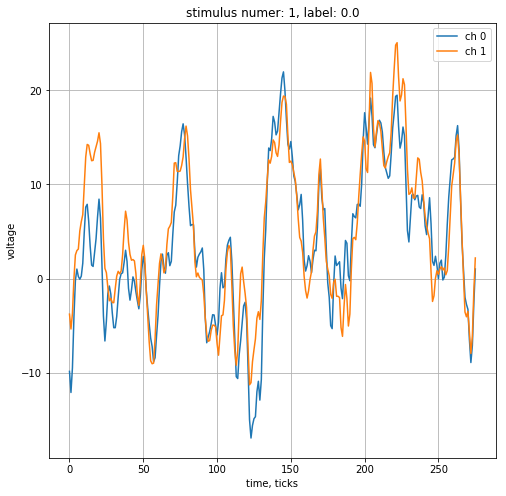

In [11]:
X_data, Y_data = load_all_data_multichannel(data_path);
number_of_samples = X_data.shape[0];
size_of_sample = X_data.shape[1];
number_of_channels = X_data.shape[2];

print('number of samples:', number_of_samples)
print('time counts:', size_of_sample)
print('number_of_channels:', number_of_channels)
print('min ', np.min(X_data), '; max ', np.max(X_data))
Y_data = Y_data - 1;
Y_data = Y_data.reshape(Y_data.shape[0])
num_classes = int(max(Y_data) + 1);
print('num_classes: ', num_classes)
y_= keras.utils.to_categorical(Y_data, int(num_classes));
show_data(X_data, Y_data, 1, [0,1])

In [8]:
x_= X_data;
test_prop = 0.1;
test_size= round(test_prop * number_of_samples, 0);
test_size = int(test_size)
train_size = number_of_samples - test_size;

train size:  6648
test size:  739
shuffled data 
original data 


ValueError: Found array with dim 3. StandardScaler expected <= 2.

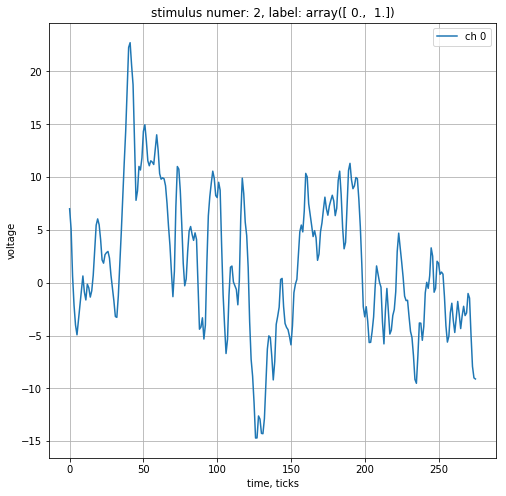

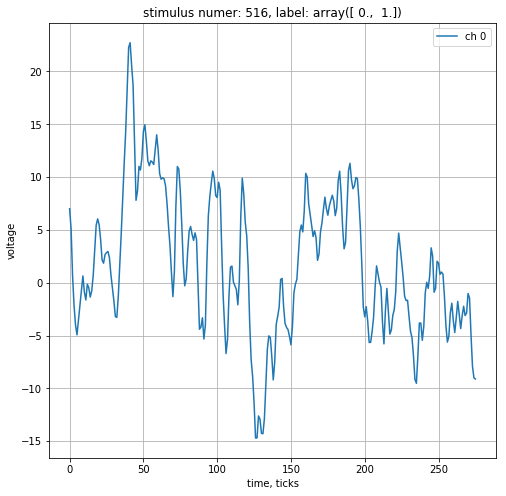

In [13]:
#random shuffle of dataset and train-test split
idx = np.random.choice(np.arange(x_.shape[0]), x_.shape[0], replace=False)
idx_train = idx[0:train_size]
idx_test = idx[train_size:]
print('train size: ', train_size)
print('test size: ', test_size)
y_train = y_[idx_train];
x_train = x_[idx_train];
y_test= y_[idx_test];
x_test= x_[idx_test];

#check we don't spoiled labels
print('shuffled data ')
show_data(x_train, y_train, 2, [0])
print('original data ')
show_data(x_, y_, idx_train[2], [0])

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
#model = create_cnn_mc_small(size_of_sample, number_of_channels, num_classes)
model = create_network_eeg_conv1_multichannel(size_of_sample, number_of_channels, num_classes)
print(model.summary())
#model = create_network_tu(size_of_sample, num_classes)
#print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 136, 64)           1344      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 67, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 63, 32)            10272     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 31, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 29, 32)            3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12, 32)            3104      
__________

In [15]:
batch_size = 10;
epochs = 20;
sgd = optimizers.Adagrad(lr=0.0001, decay=0)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

tensorboard=TensorBoard(log_dir='./logs', write_graph=True)

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[tensorboard])

score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Train on 5318 samples, validate on 1330 samples
Epoch 1/20
5318/5318 [==============================] - 4s 663us/step - loss: 0.7059 - acc: 0.4863 - val_loss: 0.6983 - val_acc: 0.5030
Epoch 2/20
5318/5318 [==============================] - 3s 517us/step - loss: 0.6962 - acc: 0.5081 - val_loss: 0.6963 - val_acc: 0.5105
Epoch 3/20
5318/5318 [==============================] - 3s 525us/step - loss: 0.6941 - acc: 0.5181 - val_loss: 0.6954 - val_acc: 0.5226
Epoch 4/20
5318/5318 [==============================] - 3s 519us/step - loss: 0.6928 - acc: 0.5244 - val_loss: 0.6949 - val_acc: 0.5256
Epoch 5/20
5318/5318 [==============================] - 3s 522us/step - loss: 0.6919 - acc: 0.5307 - val_loss: 0.6946 - val_acc: 0.5278
Epoch 6/20
5318/5318 [==============================] - 3s 522us/step - loss: 0.6913 - acc: 0.5355 - val_loss: 0.6945 - val_acc: 0.5316
Epoch 7/20
5318/5318 [==============================] - 3s 545us/step - loss: 0.6908 - acc: 0.5395 - val_loss: 0.6944 - val_acc: 0.5293
